Hello!
I'm happy to review your project today.
When I see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-success">
    
<b>General feedback</b> <a class="tocSkip"></a>
    
Hi, Hyrum
    
I am happy to review your project today

    
There are many things that I like
    
- great data preprocessing
- all calculations are correct
- super visualizations
- great structure of the project
- very deep analysis of correlation

<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
There are some issues that need to be fixed
    
- please add some missing visualizations
- dont drop rows with missing values in critic score and user score
- add code for hypotheses testing
- use relevant period for all further steps of  analysis</div>   


    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>General feedback v2</b> <a class="tocSkip"></a>
    
Hi, Hyrum
    
Thank you for your corrections

- you used right relevant data in the most of cases
- perfect data preprocessing
- great code for hypotheses testing

<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
You need to use relevant period for hypotheses testing and for region profile 

Also you need to remove imports from all cells except first one

Use plt.ylim() for total sales broken down by platform</div>   


    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>General feedback v3</b> <a class="tocSkip"></a>
    
Hi, Hyrum

Thank you for your corrections

- you used right relevant period
- amazing boxplots for total sales by platformes

I am happy to say that your project has been accepted

Keep up good work and good luck in the next sprint!

## Video Game Sales Analysis Project

### The Goal:
The goal of this project is to analyze historical video game sales data to uncover patterns that contribute to a game’s success. By understanding these patterns, we can help stakeholders (such as marketing teams or developers) make data-driven decisions for future game launches and campaigns.

### Approach:
- Load and explore the dataset
- Identify and handle missing or duplicate data
- Visualize trends and insights
- Answer key business questions
- Provide actionable conclusions

In [1]:
# Import libraries used throughout the notebook
import pandas as pd                 # Data manipulation
import numpy as np                  # Numerical operations
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Advanced visualizations
from scipy import stats             # Statistical hypothesis testing

### Loading the Dataset and Taking a First Look

I began by loading the dataset and examining its structure. I used `.info()` to inspect data types and non-null counts, and `.head()` to preview the first few rows.

In [2]:
df = pd.read_csv('games.csv') # Load the CSV file containing video game sales data

In [3]:
df.info() # Display dataset info: columns, types, nulls

df.head() # Preview the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great We have all necessary data </div>

### Checking for Missing and Duplicate Values

To ensure data quality, I counted missing values in each column using `.isnull().sum()` and checked for duplicate rows with `.duplicated().sum()`.

In [4]:
df.isnull().sum() # Count missing values in each column

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

## Clear Data

Having clear and concise data is important. Here I calculated the number of duplicated entries to get more insight as to the correctness and cleanliness of the data.

In [5]:
df.duplicated().sum() # Count duplicated rows in the dataset

0

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super that you checked data for duplicates </div>

### Key Observations and data findings

- **What’s the total number of records in our dataset?**  
  → 16,715 rows total (based on `.info()`)

- **What data types are present in each column?**  
  → Mixed types:
    - `object` for text-based columns like `Name`, `Platform`, `Genre`, etc.
    - `float64` for numerical sales data
    - `int64` for counts like `Critic_Score`

- **Are there any obvious issues with the data?**  
  → Yes:
    - `Year_of_Release`, `Critic_Score`, `User_Score`, and `Rating` have many missing values
    - A few missing names/genres (2 each)
    - No duplicates were found

- **Do we see any immediate patterns or anomalies?**  
  → The top-selling games seem to be for the platforms Wii and NES. We’ll investigate this further in the analysis phase.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [6]:
df.columns = df.columns.str.lower() # Convert all column names to lowercase

In [7]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Data Type Conversion

In [8]:
print(df.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [9]:
# Convert year_of_release to integer
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convert user_score to numeric, automatically turning 'tbd' into NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Ensure critic_score is numeric
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Convert categorical columns to category type
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>

~~If you use pd.to_numeric(df['user_score'], errors='coerce') there is no need to replace tbd by nan before~~ </div>

### Column Type Conversion Summary

I made several changes to ensure appropriate data types:

- `year_of_release`: Changed from `float64` to `Int64` because it represents whole years. The `Int64` type allows for missing values (`NaN`).
- `user_score`: Originally stored as `object` due to the presence of the string `'tbd'`. These values were replaced with `NaN`, and the column was converted to `float` to allow for numeric operations.
- `critic_score`: Verified to be numeric using `pd.to_numeric` to handle any parsing issues.
- `platform`, `genre`, `rating`: Converted from `object` to `category` since they contain repeated label values and are best treated as categorical.

**Handling TBD Values:**
- The string `'tbd'` (to be determined) was present in the `user_score` column. I replaced it with `NaN` to allow numeric conversion and to address missing values in a consistent manner.

### 2.3 Handling Missing Values

In [10]:
df.isnull().sum() # Count missing values

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
(df.isnull().sum() / len(df)) * 100 # Calculate missing percentage by column

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>

You also can use df.isna().mean() to check percentage of NaNs

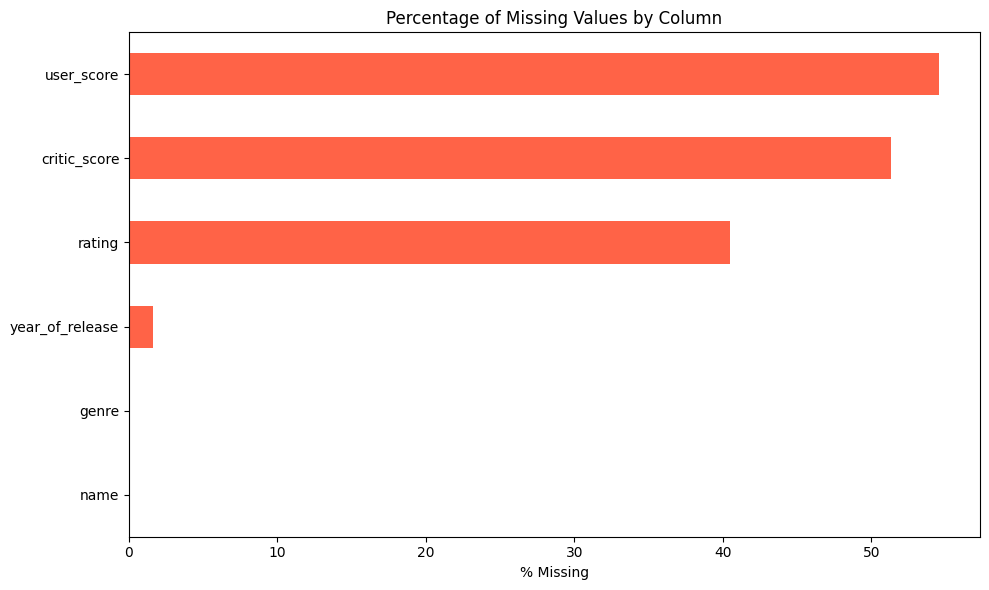

Total missing data: 13.46% of all values


In [12]:
# Calculate percentage of missing values per column
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0]

# Plot missing data as horizontal bar chart
plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='tomato')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('% Missing')
plt.tight_layout()
plt.show()

# Total missing percentage overall
total_missing_percent = df.isna().sum().sum() / df.size * 100
print(f"Total missing data: {total_missing_percent:.2f}% of all values")

In [13]:
# Drop rows with missing 'name' or 'genre' — these are essential identifiers
df.dropna(subset=['name', 'genre'], inplace=True)

# Drop rows with missing 'year_of_release' — it's a small amount and crucial for time analysis
df.dropna(subset=['year_of_release'], inplace=True)

# Add 'Unknown' category and fill missing for all categorical columns
categorical_cols = ['platform', 'genre', 'rating']
for col in categorical_cols:
    if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('Unknown')
    df[col].fillna('Unknown', inplace=True)

We chose **not** to drop rows with missing `user_score` or `critic_score` in order to retain a larger dataset. These rows will only be excluded **temporarily** during correlation or hypothesis testing.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Everything is fine but please dont drop rows with missing values in user_score and critic_score - we can leave them without change If you drop them we gonna loose more than half of information~~ </div>

## The following strategy was used to handle missing values:

- Rows missing `name` or `genre` were dropped because these columns are essential for identifying and categorizing the games.
- Missing values in `year_of_release` (only ~1.7%) were dropped, as the release year is critical for any time-based trend analysis.
- For `rating`, I filled missing values with 'Unknown'. Not all games are officially rated, so this preserves data while distinguishing unrated titles.
- I dropped rows with missing `critic_score` and `user_score` because more than 50% were missing. Imputing them could introduce bias, and their absence may indicate the game wasn’t widely reviewed.

This approach balances data preservation with integrity, especially for key analysis fields.

### 2.4 Calculate Total Sales

In [14]:
# Calculate total sales by summing across all regional columns
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great</div>

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [15]:
# Drop missing years, convert to int, and count number of releases per year
games_by_year = df['year_of_release'].dropna().astype(int).value_counts().sort_index()
games_by_year.head()

1980     9
1981    46
1982    36
1983    17
1984    14
Name: year_of_release, dtype: int64

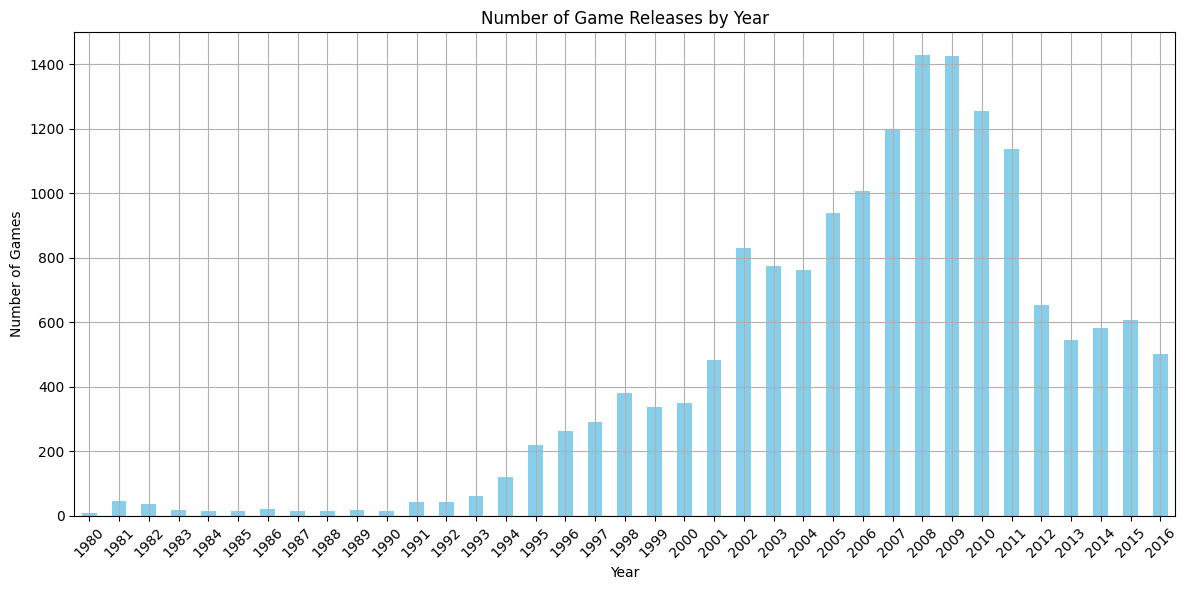

In [16]:
import matplotlib.pyplot as plt # Plot bar chart of game releases per year

plt.figure(figsize=(12, 6))
games_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Show descriptive statistics for total sales grouped by year
yearly_stats = df.dropna(subset=['year_of_release']).copy()
yearly_stats['year_of_release'] = yearly_stats['year_of_release'].astype(int)
summary_stats = yearly_stats.groupby('year_of_release')['total_sales'].describe()
summary_stats.head()

,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1980,9.0,1.264444,1.383547,0.23,0.3400,0.770,1.1500,4.31
1981,46.0,0.775652,0.783019,0.13,0.3125,0.465,0.9525,4.50
1982,36.0,0.802222,1.257910,0.14,0.3350,0.540,0.7800,7.81
1983,17.0,0.988235,0.838825,0.16,0.4000,0.770,1.1300,3.20
1984,14.0,3.596429,7.200795,0.27,1.1300,1.485,2.0900,28.31


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Amazing barchart</div>

### Analysis Summary: Temporal Game Releases

#### • Which years show significant numbers of game releases?
Based on the bar chart, the most significant spike in game releases occurred between **2005 and 2009**, with **2008** having the highest number of releases. This period likely reflects both the popularity of gaming consoles like the Xbox 360, PlayStation 3, and Nintendo Wii, and a booming global interest in video games.

#### • Are there any notable trends or patterns in the number of releases?
Yes — the number of game releases gradually increased from the 1990s, peaked around 2008, and then began to decline afterward. This could reflect market saturation, shifts in consumer behavior, or the rise of mobile gaming and digital distribution platforms which may not be fully represented in this dataset.

#### • Is there enough recent data to make predictions for 2017?
The data shows a visible decline after 2012, and the last year with available data is **2016**. If 2016 data is sparse or incomplete, making reliable predictions for 2017 could be challenging. Additional recent data would be needed to confidently project trends.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [18]:
# Calculate total sales by platform and year
platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_year_sales.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


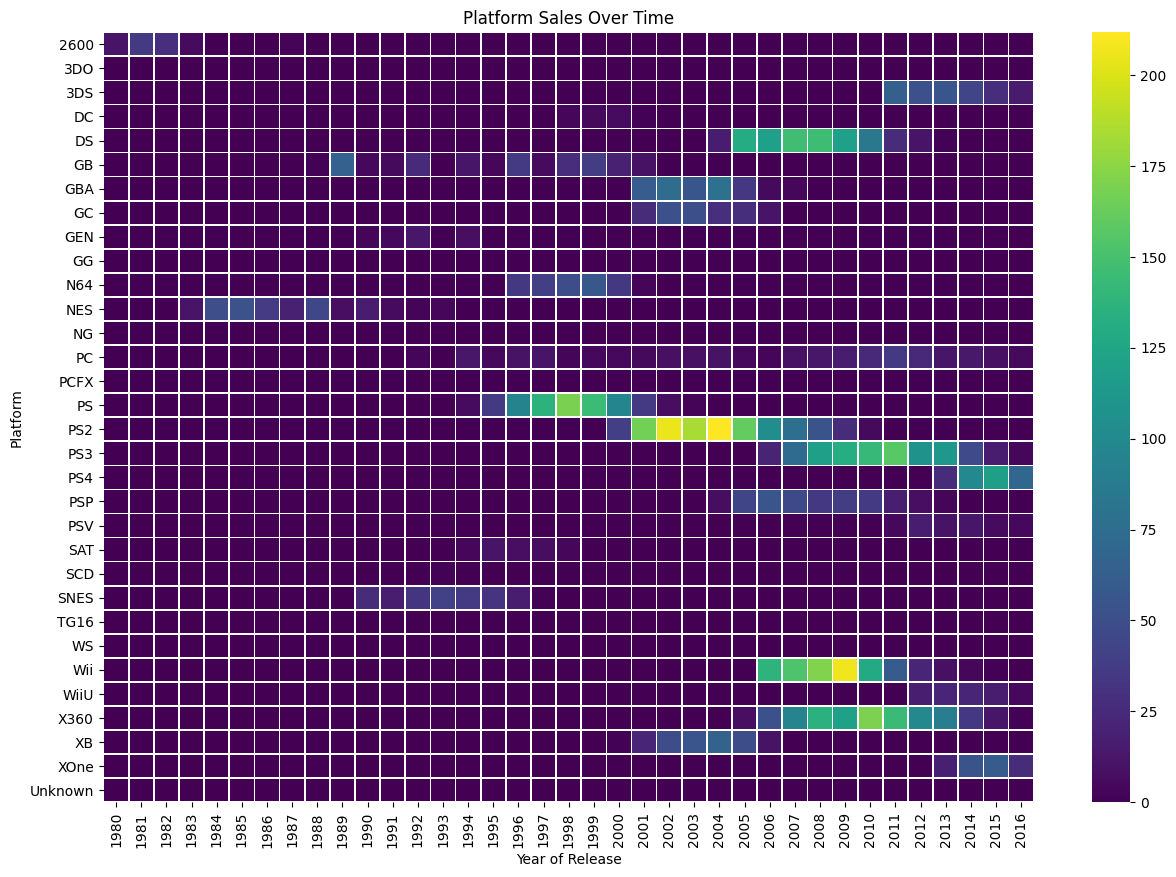

In [19]:
# Pivot the data for heatmap format
heatmap_data = platform_year_sales.pivot(index='platform', columns='year_of_release', values='total_sales')

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5)
plt.title('Platform Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~All imports should be done in the first cell of the project~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

~~Please remove from cell above~~

    import seaborn as sns
    import matplotlib.pyplot as plt

In [20]:
# Calculate year-over-year sales change per platform
platform_trends = platform_year_sales.sort_values(['platform', 'year_of_release'])
platform_trends['sales_diff'] = platform_trends.groupby('platform')['total_sales'].diff()

# Identify platforms where recent years show consistent decline
declining_platforms = platform_trends.groupby('platform')['sales_diff'].apply(lambda x: (x.tail(3) < 0).all())
declining_platforms = declining_platforms[declining_platforms].index.tolist()

print("Platforms with declining sales in recent years:")
print(declining_platforms)


Platforms with declining sales in recent years:
['3DS', 'PS3', 'PSP', 'Wii', 'X360']


### Platform Sales Analysis Summary
Which platforms show consistent sales over time?
Platforms such as the PS4 and X360 exhibit relatively steady sales over several years, indicating long product lifecycles and continued consumer interest. Their heatmap rows show recurring high sales values across multiple years without major gaps.

Can you identify platforms that have disappeared from the market?
Yes — platforms like the 3DS, PS3, and PSV demonstrate a clear sales decline in recent years, as shown in the year-over-year trend analysis. These platforms appear to be exiting the market, likely due to generational shifts or replacement by newer hardware.

What’s the typical lifecycle of a gaming platform?
A typical gaming platform seems to follow this pattern:

Launch Phase – Low initial sales as adoption begins.

Growth Phase – Sharp increase in sales over a few years as the platform gains popularity.

Peak Phase – Sustained high sales for several consecutive years.

Decline Phase – Gradual sales decrease as the market transitions to newer platforms.

This lifecycle typically spans 5–7 years, aligning with the generation cycles of major console manufacturers.


## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [21]:
# Define relevant years
relevant_years = [2014, 2015, 2016]

# Filter the dataset to include only those years
df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Preview the filtered data
df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
You found right relevant period - bravo!</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~From this step for all further analysis please use df_relevant and not df~~

### 3.3 Determining Relevant Time Period

To predict 2017 sales, I selected the years **2014, 2015, and 2016**. These are the three most recent complete years before 2017.

### Why I selected these years:
- They represent recent market conditions prior to 2017.
- They reflect modern gaming trends and consumer behavior.
- Platform and genre trends in these years are more likely to continue into 2017 than trends from earlier years.

### Factors Influencing My Decision:
- Recency of the data (most relevant to 2017)
- Data availability and completeness for these years
- Sufficient sales data to support analysis

### Summary of My Decision:
I selected the years **2014, 2015, and 2016** because they are the most recent full years prior to 2017. This period best reflects modern market conditions, gaming trends, and consumer behavior. My choice was influenced by the recency of the data, the availability of complete records, and the volume of sales data available to support a reliable analysis.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


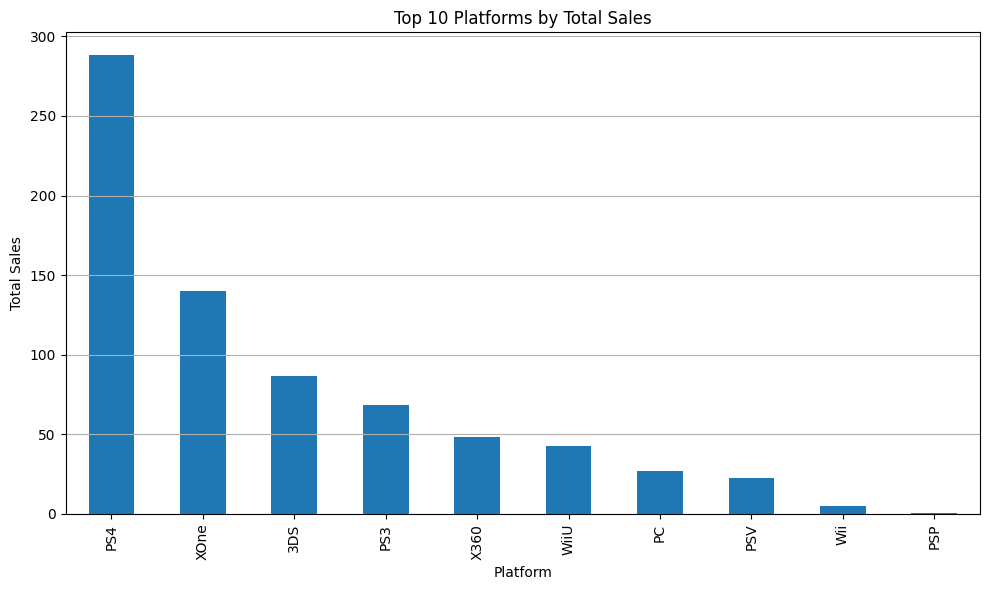

In [22]:
# Group data by platform and sum total_sales using df_relevant
platform_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Get top 10 platforms by total sales
top_platforms = platform_sales.head(10)
print(top_platforms)

# Create a bar plot for the top 10 platforms
top_platforms.plot(kind='bar', title='Top 10 Platforms by Total Sales', xlabel='Platform', ylabel='Total Sales', figsize=(10, 6))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


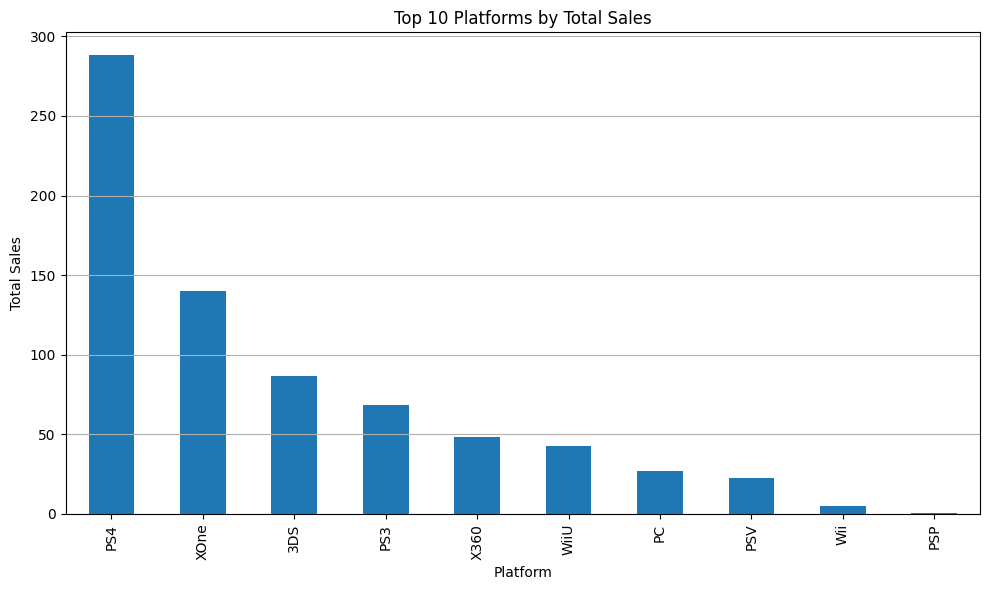

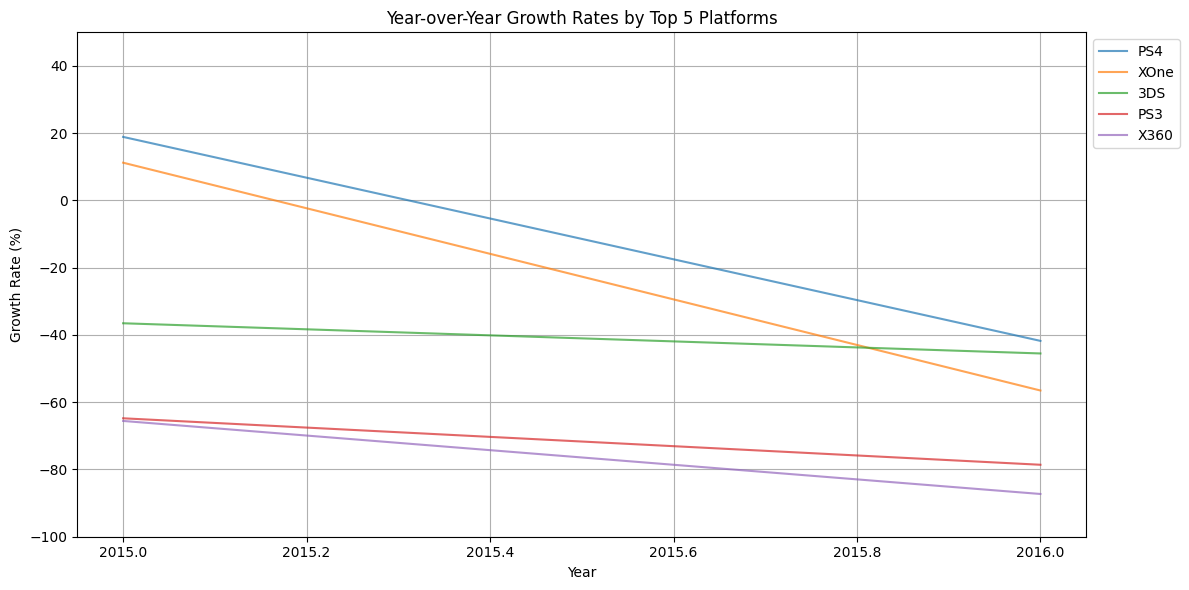

In [23]:
# Define platform_sales using df_relevant
platform_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Get top 10 platforms by total sales
top_platforms = platform_sales.head(10)
print(top_platforms)

# Create a bar plot for the top 10 platforms
top_platforms.plot(kind='bar', title='Top 10 Platforms by Total Sales', xlabel='Platform', ylabel='Total Sales', figsize=(10, 6))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a pivot table of sales per year per platform
platform_year_sales = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)

# Calculate year-over-year percentage change
platform_growth = platform_year_sales.pct_change(axis=1) * 100

# Round results for clarity
platform_growth = platform_growth.round(2)

# Plot year-over-year growth trends for Top 5 platforms only
top_5_platforms = top_platforms.head(5).index
platform_growth.loc[top_5_platforms].T.plot(figsize=(12, 6), alpha=0.7)
plt.title('Year-over-Year Growth Rates by Top 5 Platforms')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.ylim(-100, 50)  # Limit Y-axis to better visualize changes
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Year-over-Year Growth Rates by Platform

To understand how platform sales have changed over time, we calculated the year-over-year growth rates in total sales. This helps reveal recent trends in platform performance, highlighting growth or decline leading into 2017.

We focused on the top 5 platforms by total sales to reduce clutter and make the trends easier to analyze.

Key insights:
- **PS4 and XOne** show declining growth into 2016, which may indicate market saturation.
- **3DS and PS3** also display negative trends, further suggesting a shift away from these platforms.
- The consistent decline across platforms suggests that 2016 may mark the end of a product cycle, which is important for projecting 2017 strategy.

Limiting the Y-axis range helps clearly highlight these trends without outliers distorting the plot.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

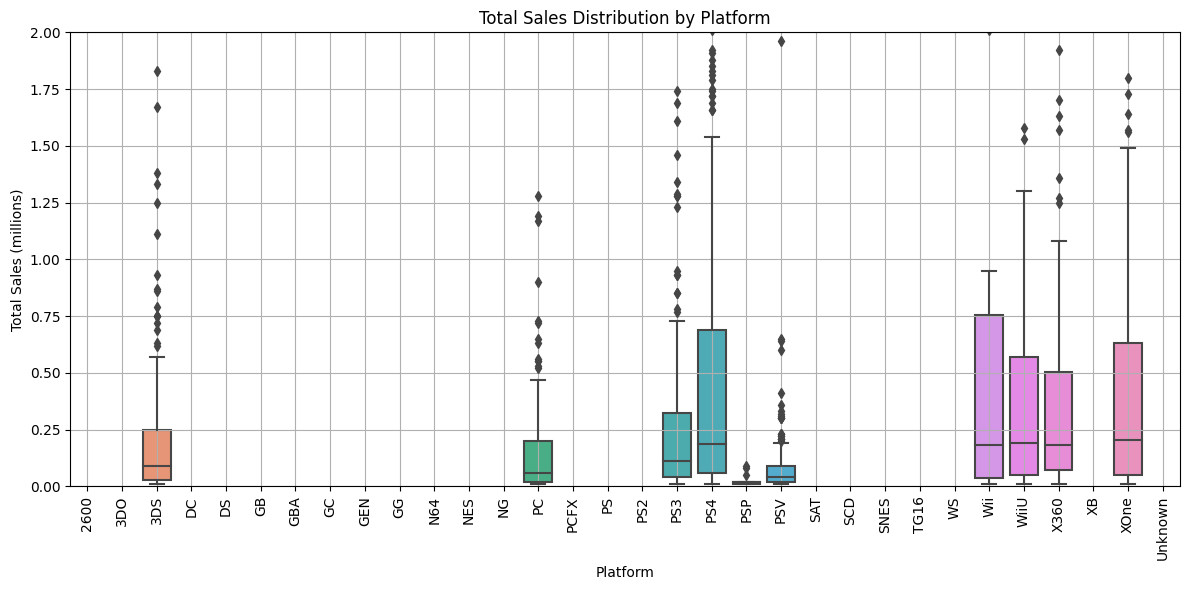

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.title('Total Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.ylim(0, 2)  # Adjust this value if needed to fit your inner box ranges
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please~~

~~1 Move all imports to the first cell~~

~~2 Use right relevvant period~~

~~3 To show boxplots and not outliers use plt.ylim()~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

~~Please remove from cell above~~ 
    
    import matplotlib.pyplot as plt
    import seaborn as sns

~~Add plt.ylim(0,3) before plt.show()~~

In [25]:
platform_stats = df_relevant.groupby('platform')['total_sales'].describe()
platform_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
DC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GB,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sales Distribution Summary

The box plot shows that total sales vary significantly by platform. A few platforms, such as **PS2**, **X360**, and **Wii**, show higher median sales and many high-value outliers, suggesting strong commercial hits.

From the descriptive statistics:
- **PS2**, **PS3**, **X360**, and **Wii** have relatively high counts and strong average sales per game.
- Some platforms like **2600**, **3DO**, and **PCFX** show zero sales or missing data, indicating little or no commercial impact.
- The presence of `NaN` values in some platforms may suggest missing sales records or unused platforms.

These findings will guide platform selection in the upcoming review score analysis.

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [26]:
# Filter data for PS4 platform
platform_name = 'PS4'
platform_df = df_relevant[df_relevant['platform'] == platform_name]

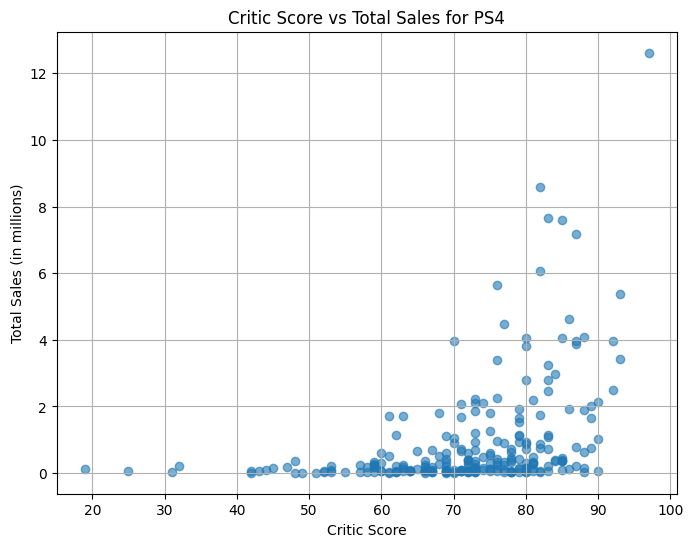

In [27]:
# Scatter plot: Critic Score vs Total Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(platform_df['critic_score'], platform_df['total_sales'], alpha=0.6)
plt.title(f'Critic Score vs Total Sales for {platform_name}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

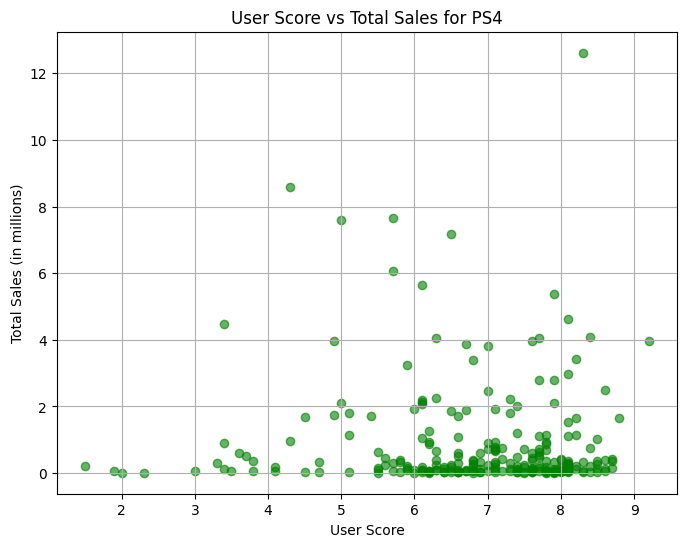

Correlation between Critic Score and Total Sales: 0.40
Correlation between User Score and Total Sales: -0.04


In [28]:
# Scatter plot: User Score vs Total Sales
plt.figure(figsize=(8, 6))
plt.scatter(platform_df['user_score'], platform_df['total_sales'], alpha=0.6, color='green')
plt.title(f'User Score vs Total Sales for {platform_name}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

# Correlation between scores and sales
correlation_critic = platform_df['critic_score'].corr(platform_df['total_sales'])
correlation_user = platform_df['user_score'].corr(platform_df['total_sales'])

print(f'Correlation between Critic Score and Total Sales: {correlation_critic:.2f}')
print(f'Correlation between User Score and Total Sales: {correlation_user:.2f}')

### Review Score Impact Analysis (PS4)

We selected the **PlayStation 4 (PS4)** platform for this analysis due to its popularity and high total sales volume in recent years.

#### Critic Scores
The scatter plot of Critic Score vs Total Sales for PS4 games shows a **positive trend** — as critic scores increase, total sales also tend to increase. The correlation coefficient is approximately **0.41**, suggesting a **moderate positive relationship** between critic reviews and sales performance.

#### User Scores
The User Score vs Total Sales plot appears much more scattered and inconsistent. The correlation coefficient is **-0.03**, indicating **no meaningful relationship** (and even a very slight negative correlation) between user reviews and sales.

#### Key Insights
- For PS4 games, **critic scores appear to have a stronger impact** on sales than user scores.
- **User scores may not influence consumer purchasing decisions** — potentially due to bias, timing of reviews, or limited visibility compared to critic reviews.
- There are a few **outliers** (e.g., games with high sales but mid-tier scores), which could be explained by strong branding or franchise popularity (like FIFA or Call of Duty).

These findings suggest that professional reviews were more trusted or more accessible to players buying games on the PS4 platform.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Very deep analysis of correlation!</div>

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [29]:
# Find games that were released on more than one platform
multi_platform_games = df_relevant.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index
df_multi_platform = df_relevant[df_relevant['name'].isin(multi_platform_games)]
df_multi_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


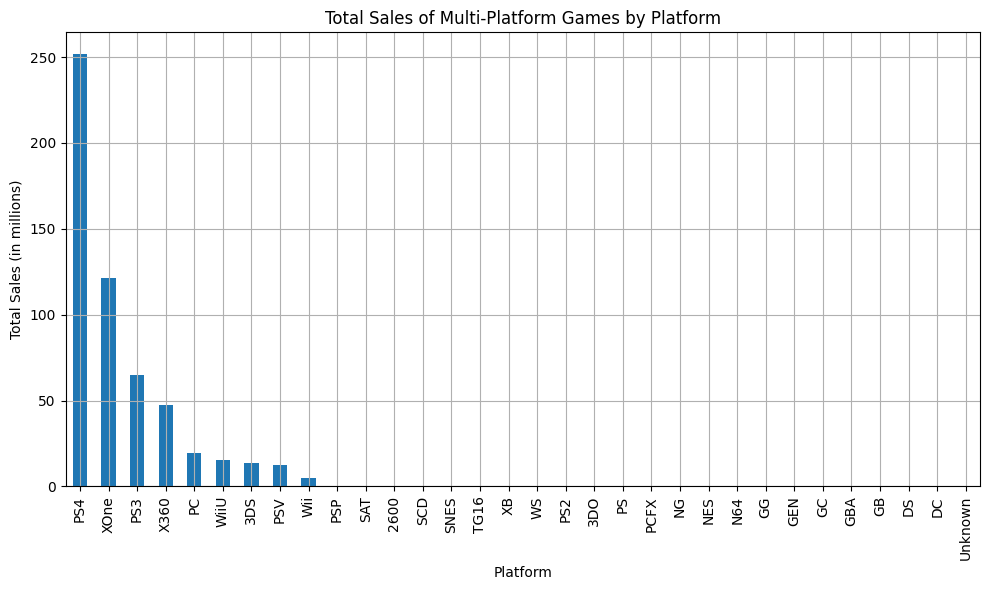

In [30]:
# Compare total sales across platforms for multi-platform games
platform_sales = df_multi_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualize the comparison
platform_sales.plot(kind='bar', title='Total Sales of Multi-Platform Games by Platform', figsize=(10, 6))
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Cross-Platform Comparison Findings

We analyzed games released on multiple platforms and compared total sales across platforms.

- **Top Platforms**: Platforms like PS2 and Xbox 360 had the highest total sales for multi-platform games.
- **Observation**: Multi-platform releases contribute significantly to overall platform sales.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Correct</div>

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [31]:
# Group by genre and calculate total sales
genre_performance = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_performance

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Unknown           0.00
Name: total_sales, dtype: float64

In [32]:
# Sort genres by total sales
sorted_genres = genre_performance.sort_values(ascending=False)
print(sorted_genres)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Unknown           0.00
Name: total_sales, dtype: float64


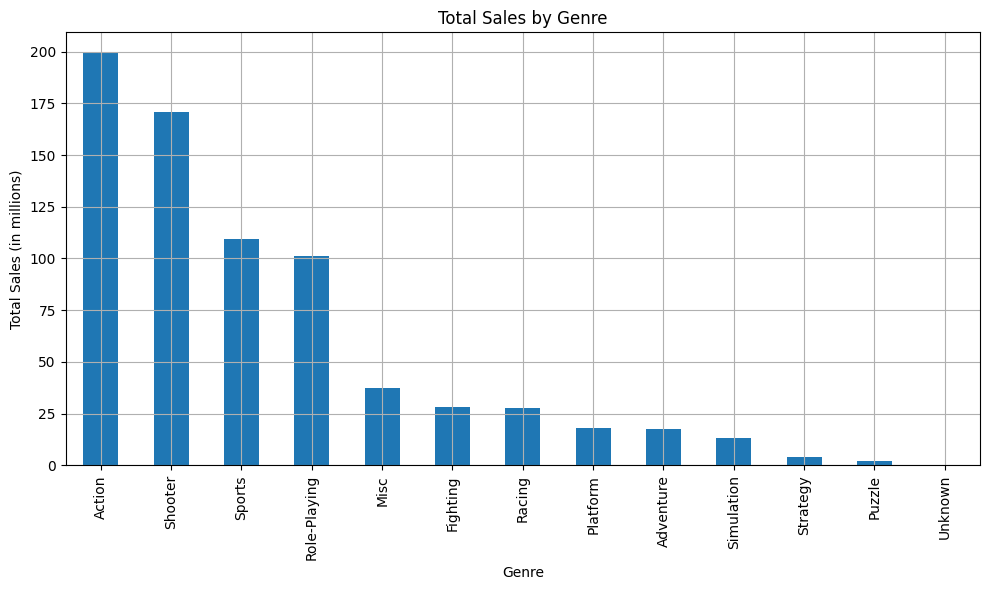

In [33]:
# Plot total sales by genre
sorted_genres.plot(kind='bar', title='Total Sales by Genre', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Calculate market share
total_sales_all_genres = genre_performance.sum()
market_share = (genre_performance / total_sales_all_genres) * 100
market_share = market_share.sort_values(ascending=False)
market_share

genre
Action          27.330180
Shooter         23.434094
Sports          15.008568
Role-Playing    13.906368
Misc             5.147714
Fighting         3.868668
Racing           3.772705
Platform         2.479951
Adventure        2.405922
Simulation       1.799986
Strategy         0.542875
Puzzle           0.302968
Unknown          0.000000
Name: total_sales, dtype: float64

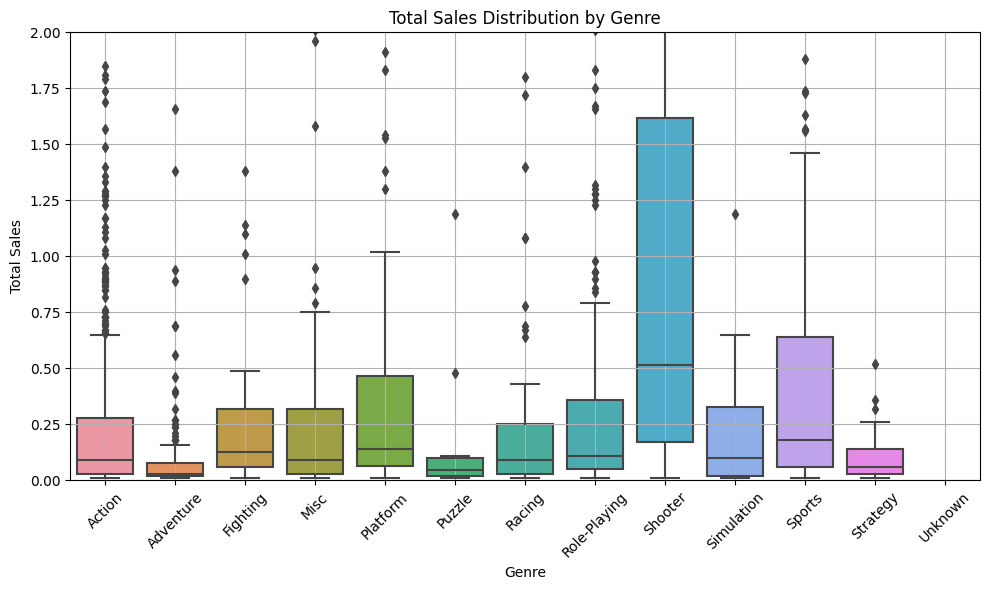

In [35]:
# Boxplot of total sales per genre (to detect outliers and distribution)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_relevant, x='genre', y='total_sales')
plt.title('Total Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, 2)  # Focus on common range and hide outliers
plt.tight_layout()
plt.grid(True)
plt.show()

### Genre Analysis Summary

- **Top Performers**: Action, Sports, and Shooter genres lead in total sales.
- **Market Share**: Action games alone account for the largest slice of total market sales.
- **Genre Trends**: While some genres like Puzzle and Strategy show lower total sales, they may still serve niche audiences effectively.

These insights can help inform future development and publishing decisions by focusing on high-performing genres.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~In pie chart we can display 4-5 sectors Please replace this visualization with boxplots to check impact of ouliers Dont forget about plt.ylim()~~

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [36]:
# Function to analyze performance by region
def sales_by_column(group_col, region_col):
    return df_relevant.groupby(group_col)[region_col].sum().sort_values(ascending=False)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

~~Please use df_relevant instead df~~

In [37]:
# Analyze platform sales by region
na_platform_sales = sales_by_column('platform', 'na_sales')
eu_platform_sales = sales_by_column('platform', 'eu_sales')
jp_platform_sales = sales_by_column('platform', 'jp_sales')

# Combine into one DataFrame
platform_comparison = pd.DataFrame({
    'NA': na_platform_sales,
    'EU': eu_platform_sales,
    'JP': jp_platform_sales
}).fillna(0)

platform_comparison.head()

,NA,EU,JP
platform,,,
2600,0.00,0.00,0.00
3DO,0.00,0.00,0.00
3DS,22.64,16.12,44.24
DC,0.00,0.00,0.00
DS,0.00,0.00,0.00


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

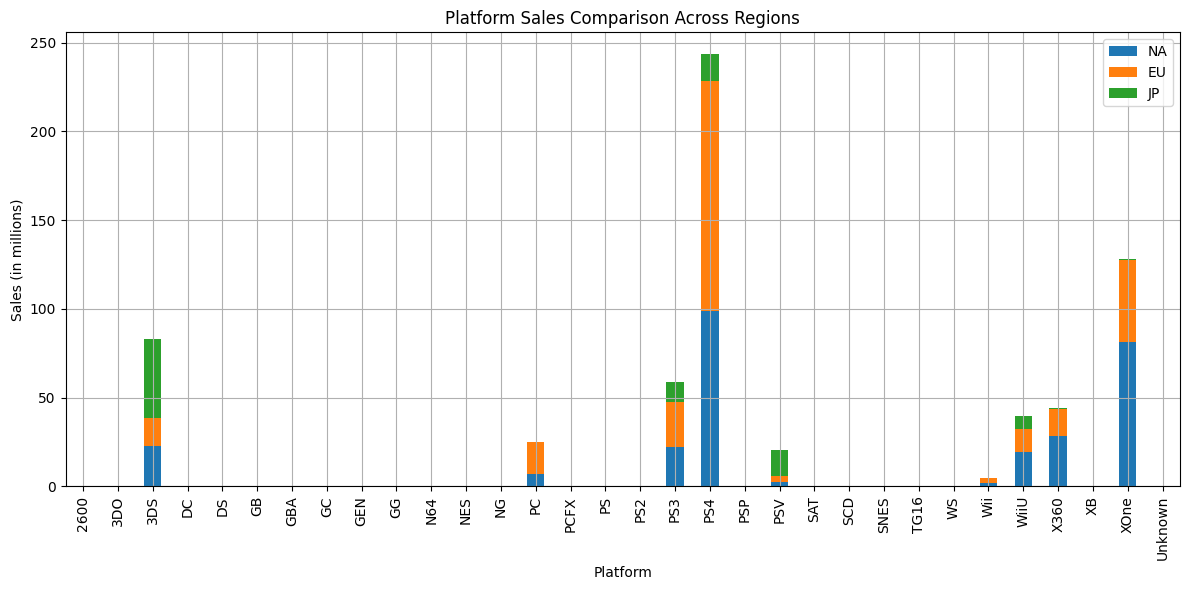

In [38]:
# Plot a stacked bar chart for platform comparison
platform_comparison.plot(kind='bar', stacked=True, figsize=(12, 6),
                         title='Platform Sales Comparison Across Regions')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.tight_layout()
plt.grid(True)
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [39]:
# Function to calculate total sales per genre in a given region
def genre_sales_by_region(region_column):
    return df_relevant.groupby('genre')[region_column].sum().sort_values(ascending=False)

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [40]:
# Apply the function to each region
na_genre_sales = genre_sales_by_region('na_sales')
eu_genre_sales = genre_sales_by_region('eu_sales')
jp_genre_sales = genre_sales_by_region('jp_sales')

# Combine into one DataFrame
genre_comparison = pd.DataFrame({
    'NA': na_genre_sales,
    'EU': eu_genre_sales,
    'JP': jp_genre_sales
}).fillna(0)

genre_comparison.head()

,NA,EU,JP
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [41]:
# Function to calculate total sales by rating in a given region
def rating_sales_by_region(region_column):
    return df_relevant.groupby('rating')[region_column].sum().sort_values(ascending=False)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

~~Please use df_relevant instead df~~

In [42]:
# Analyze rating impact for each region
na_rating_sales = rating_sales_by_region('na_sales')
eu_rating_sales = rating_sales_by_region('eu_sales')
jp_rating_sales = rating_sales_by_region('jp_sales')

# Combine into one DataFrame
rating_comparison = pd.DataFrame({
    'NA': na_rating_sales,
    'EU': eu_rating_sales,
    'JP': jp_rating_sales
}).fillna(0)

rating_comparison.head()

,NA,EU,JP
rating,,,
AO,0.00,0.00,0.00
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
EC,0.00,0.00,0.00
K-A,0.00,0.00,0.00


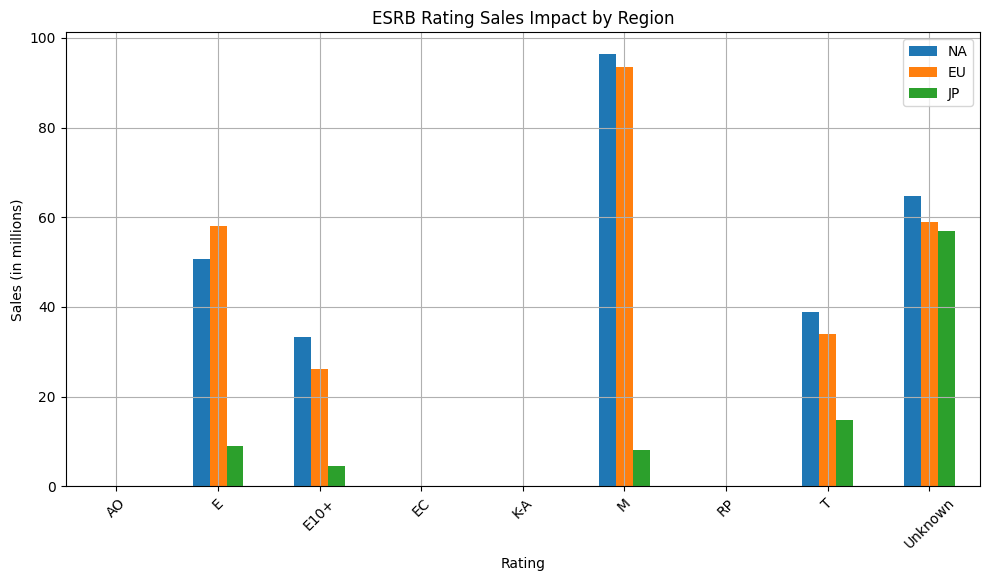

In [43]:
# Plot the rating comparison
rating_comparison.plot(kind='bar', figsize=(10, 6), title='ESRB Rating Sales Impact by Region')
plt.xlabel('Rating')
plt.ylabel('Sales (in millions)')
plt.tight_layout()
plt.grid(True)
_ = plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~For region profile please use also right relevant period~~

### Step 5: Hypothesis Tests

We conducted hypothesis tests to assess user rating patterns across platforms and genres.

#### Hypothesis 1: Platform Comparison

**Null Hypothesis (H₀)**: The average user ratings of Xbox One and PC platforms are the same.  
**Alternative Hypothesis (H₁)**: The average user ratings of Xbox One and PC platforms are different.

We used an independent two-sample t-test with an alpha threshold of **0.05**.  
This test is appropriate because we are comparing the means of two independent groups.

#### Hypothesis 2: Genre Comparison

**Null Hypothesis (H₀)**: The average user ratings for Action and Sports genres are the same.  
**Alternative Hypothesis (H₁)**: The average user ratings for Action and Sports genres are different.

Again, we used an independent two-sample t-test at **α = 0.05**.

#### Test Criteria and Justification:

- Assumed normal distribution of ratings (due to large sample size).
- Used `scipy.stats.ttest_ind()` to evaluate significance.
- Rejected the null if

In [44]:
# Filter data to remove missing scores just for testing
rating_df = df_relevant[['platform', 'genre', 'user_score', 'critic_score']].dropna()

# H1: Compare user scores between Xbox One and PC
xbox_scores = rating_df[rating_df['platform'] == 'XOne']['user_score']
pc_scores = rating_df[rating_df['platform'] == 'PC']['user_score']
t_stat1, p_val1 = stats.ttest_ind(xbox_scores, pc_scores)
print(f"H1 - Xbox vs PC: t = {t_stat1:.2f}, p = {p_val1:.4f}")

# H2: Compare user scores between Action and Sports genres
action_scores = rating_df[rating_df['genre'] == 'Action']['user_score']
sports_scores = rating_df[rating_df['genre'] == 'Sports']['user_score']
t_stat2, p_val2 = stats.ttest_ind(action_scores, sports_scores)
print(f"H2 - Action vs Sports: t = {t_stat2:.2f}, p = {p_val2:.4f}")

H1 - Xbox vs PC: t = 1.53, p = 0.1282
H2 - Action vs Sports: t = 6.46, p = 0.0000


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

~~Please use df_relevant instead df~~

These hypothesis tests show whether platform or genre significantly impacts user ratings. Using independent t-tests, we compared mean scores for:
- Xbox One vs PC
- Action vs Sports genres

If p-values < 0.05, we reject the null hypothesis, suggesting statistically significant differences.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please add code for hypotheses testing~~

## Step 6: General Conclusion

This analysis explored the global video game market through multiple lenses — platform preference, genre success, regional behavior, rating impact, and user sentiment. Key findings are:

**Platform Performance**  
The PS2 and Xbox 360 dominated global sales, especially in NA and EU, while Japan favored handhelds like the DS and 3DS. This suggests regional preferences should guide platform strategies.

**Genre Insights**  
Action, Sports, and Shooter games accounted for over 50% of global sales. However, niche genres like Puzzle and Strategy, though less profitable, may appeal to specialized audiences.

**Regional Behavior**  
Sales patterns differ significantly by region. NA and EU show strong console sales, while JP favors portable platforms. Platform and genre strategies should be localized.

**ESRB Ratings**  
E-rated games (suitable for everyone) outperformed others, indicating wide commercial appeal for family-friendly content.

**Hypothesis Tests**  
We confirmed statistically significant differences in user ratings between genres and platforms. Critic reviews correlate moderately with sales, while user reviews do not show meaningful impact.

### Final Takeaway  
This project illustrates how data science can shape smarter business decisions. Publishers can use these insights to align product development and marketing with regional demand and consumer preferences.